参考： 
[点赞收藏！PyTorch 常用代码段整理合集](https://mp.weixin.qq.com/s/2bpT93KrqwWfE-Ob0iC8xA)

[PyTroch深度学习全集 - Deep Learning With PyTorch](https://www.bilibili.com/video/BV1g44y1L7MU?p=18&vd_source=abeb4ad4122e4eff23d97059cf088ab4)

1. 基本配置
2. 张量处理
3. 构建数据集
4. 模型定义和操作

## 1. 基本配置

### 导入包和版本查询

In [21]:
import torch
import torch.nn as nn
# import torchvision
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
# print(torch.cuda.get_device_name(0))

1.9.0
None
None


## 2. 张量处理

### 2.1 张量基本信息
- dtype    数据类型
- shape/ size()
- dim() 维度：0，1，2，3

In [8]:
import numpy as np
import torch 

i = torch.tensor(1);print(i,i.dtype)
x = torch.tensor(2.0);print(x,x.dtype)
b = torch.tensor(True);print(b,b.dtype)

tensor(1) torch.int64
tensor(2.) torch.float32
tensor(True) torch.bool


In [4]:
a = torch.tensor([1,2,6], dtype=torch.long)
a.shape

torch.Size([3])

In [23]:
tensor2 = torch.tensor([[1.0,1,2],
                        [9,6.0,5]])  # 2维张量
print(tensor2, tensor2.dtype)
print(tensor2.dim())
tensor2.shape, tensor2.size()

tensor([[1., 1., 2.],
        [9., 6., 5.]]) torch.float32
2


(torch.Size([2, 3]), torch.Size([2, 3]))

### 2.2 reshape()

In [198]:
# 背景：将一定batch 的灰色图片转为 神经网络的输入通道
a = torch.rand(2,1,3,3)  # 图片 3*3
print(a)
a.reshape(-1, 3*3)

tensor([[[[0.2863, 0.2434, 0.0224],
          [0.3998, 0.2976, 0.2117],
          [0.1405, 0.1507, 0.6240]]],


        [[[0.6778, 0.6684, 0.3850],
          [0.8964, 0.3528, 0.9176],
          [0.6314, 0.8142, 0.7886]]]])


tensor([[0.2863, 0.2434, 0.0224, 0.3998, 0.2976, 0.2117, 0.1405, 0.1507, 0.6240],
        [0.6778, 0.6684, 0.3850, 0.8964, 0.3528, 0.9176, 0.6314, 0.8142, 0.7886]])

In [222]:
# flatten 操作
a = torch.rand(4,2,3,3)
print(a)
a = a.view(-1, 2*3*3)
a, a.shape

tensor([[[[0.5726, 0.3404, 0.9987],
          [0.8771, 0.6951, 0.7465],
          [0.9132, 0.5343, 0.2981]],

         [[0.2850, 0.6088, 0.4029],
          [0.8239, 0.7907, 0.6458],
          [0.3276, 0.0835, 0.4698]]],


        [[[0.2947, 0.2272, 0.6523],
          [0.9183, 0.9252, 0.3152],
          [0.9625, 0.3752, 0.2909]],

         [[0.5300, 0.6728, 0.2523],
          [0.5877, 0.0346, 0.0448],
          [0.1153, 0.0017, 0.0829]]],


        [[[0.1807, 0.5857, 0.1392],
          [0.6703, 0.6728, 0.4105],
          [0.0421, 0.6304, 0.9662]],

         [[0.1351, 0.3727, 0.3690],
          [0.3808, 0.6763, 0.4332],
          [0.2359, 0.4036, 0.7497]]],


        [[[0.0856, 0.3369, 0.6319],
          [0.2350, 0.9349, 0.2110],
          [0.7471, 0.2944, 0.2042]],

         [[0.2083, 0.6934, 0.4174],
          [0.0713, 0.4463, 0.6712],
          [0.4427, 0.8662, 0.5081]]]])


(tensor([[0.5726, 0.3404, 0.9987, 0.8771, 0.6951, 0.7465, 0.9132, 0.5343, 0.2981,
          0.2850, 0.6088, 0.4029, 0.8239, 0.7907, 0.6458, 0.3276, 0.0835, 0.4698],
         [0.2947, 0.2272, 0.6523, 0.9183, 0.9252, 0.3152, 0.9625, 0.3752, 0.2909,
          0.5300, 0.6728, 0.2523, 0.5877, 0.0346, 0.0448, 0.1153, 0.0017, 0.0829],
         [0.1807, 0.5857, 0.1392, 0.6703, 0.6728, 0.4105, 0.0421, 0.6304, 0.9662,
          0.1351, 0.3727, 0.3690, 0.3808, 0.6763, 0.4332, 0.2359, 0.4036, 0.7497],
         [0.0856, 0.3369, 0.6319, 0.2350, 0.9349, 0.2110, 0.7471, 0.2944, 0.2042,
          0.2083, 0.6934, 0.4174, 0.0713, 0.4463, 0.6712, 0.4427, 0.8662, 0.5081]]),
 torch.Size([4, 18]))

### 张量切片

In [37]:
import numpy as np

a = torch.rand(2, 3)
print(a)
b = torch.BoolTensor(np.array([1,0,2,0])); print(b,b.dtype)
a.dim(), a[1,:], a[1,1], a[:,0], a[:,2]

tensor([[0.1093, 0.2145, 0.2509],
        [0.2316, 0.9392, 0.2257]])
tensor([ True, False,  True, False]) torch.bool


(2,
 tensor([0.2316, 0.9392, 0.2257]),
 tensor(0.9392),
 tensor([0.1093, 0.2316]),
 tensor([0.2509, 0.2257]))

###  自动微分

In [40]:
x = torch.tensor([2.], requires_grad=True)
>>> y = torch.tensor([3.], requires_grad=True)
>>> z= (x+y) * (y-2)
>>> a
>>> z
>>> z.backward()  # (y-2, y-2+x+y)
>>> x.grad, y.grad


(tensor([1.]), tensor([6.]))

- 梯度累计现象

.grad.zero_()

In [47]:
# 注意计算梯度会累积
weights = torch.ones(4, requires_grad= True)  # （1,1,1，）

for epoch in range(3):
    model_output = (weights*3).sum()  # 要是标量
    model_output.backward()
    print(weights.grad)  
    weights.grad.zero_()  # 梯度清零
print(f'*'*30)
for epoch in range(3):
    model_output = (weights*3).sum()  # 要是标量
    model_output.backward()
    print(weights.grad) 
#     weights.grad.zero_()  # 梯度清零


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
******************************
tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


- 反向传播

1）链式法则：
x->a(x)-->y-->b(y)-->z

2）计算图


In [52]:
import torch
x= torch.tensor(1.0)
y = torch.tensor(2.0)

w= torch.tensor(1.0, requires_grad=True)

#计算 loss
y_hat = w*x
loss = (y_hat-y)**2
print(loss)
# backward pass
loss.backward()
print(w.grad)

# update

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [66]:
"""
手动梯度计算，使用 numpy
"""
import numpy as np
f = w*x  # 2

X= np.array([1,2,3,4], dtype=np.float32)
Y= np.array([2,4,6,8], dtype=np.float32)

w = 0.0  # 初始化权重

def forward(x):
    return w*x

def loss(y, y_hat):
    return ((y_hat -y)**2).mean()

def gradient(x,y,y_hat):
    """
    手动梯度计算
    J = 1/N * (wx-y)**2
    """
    return np.dot(2*x, y_hat-y).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
epochs = 20
for epoch in range(epochs):
    y_hat = forward(X)
    l =loss(Y, y_hat)
    
    dw = gradient(X,Y, y_hat)
    
#     update weights
    w -= learning_rate* dw
    if epoch % 2 ==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss = {l:.8f}')
print(f'prediction before training: f(5) = {forward(5):.3f}')
      

prediction before training: f(5) = 0.000
epoch 1: w=1.200, loss = 30.00000000
epoch 3: w=1.872, loss = 0.76800019
epoch 5: w=1.980, loss = 0.01966083
epoch 7: w=1.997, loss = 0.00050331
epoch 9: w=1.999, loss = 0.00001288
epoch 11: w=2.000, loss = 0.00000033
epoch 13: w=2.000, loss = 0.00000001
epoch 15: w=2.000, loss = 0.00000000
epoch 17: w=2.000, loss = 0.00000000
epoch 19: w=2.000, loss = 0.00000000
prediction before training: f(5) = 10.000


In [130]:
"""
使用 torch 计算
"""
import torch
f = w*x  # 2

X= torch.tensor([1,2,3,4], dtype=torch.float32)
Y= torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad =True)  # 初始化权重

def forward(x):
    return w*x

def loss(y, y_hat):
    return ((y_hat -y)**2).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
epochs = 200
for epoch in range(epochs):
    y_hat = forward(X)
    l =loss(Y, y_hat)
    
    l.backward()  # dl/dw
    
#     update weights
    with torch.no_grad():
        w -= learning_rate* w.grad
    w.grad.zero_()
    if epoch % 20 ==0:
        print(f'epoch {epoch+1}: w={w:.3f}, loss = {l:.8f}')
print(f'prediction before training: f(5) = {forward(5):.3f}')
      

prediction before training: f(5) = 10.000
epoch 1: w=2.000, loss = 0.00000000
epoch 21: w=2.000, loss = 0.00000000
epoch 41: w=2.000, loss = 0.00000000
epoch 61: w=2.000, loss = 0.00000000
epoch 81: w=2.000, loss = 0.00000000
epoch 101: w=2.000, loss = 0.00000000
epoch 121: w=2.000, loss = 0.00000000
epoch 141: w=2.000, loss = 0.00000000
epoch 161: w=2.000, loss = 0.00000000
epoch 181: w=2.000, loss = 0.00000000
prediction before training: f(5) = 10.000


In [140]:
"""
Pipeline
使用 torch 计算
"""
import torch
import torch.nn as nn
f = w*x  # 2

X= torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y= torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)  # (4,1)

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
    
print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    y_hat = model(X)
    l =loss(Y, y_hat)
    l.backward()  # dl/dw
    
#     update weights
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 20 ==0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss = {l:.8f}')
        print(f'epoch {epoch+1}: b={b[0]:.3f}, loss = {l:.8f}')
        
print(f'prediction before training: f(5) = {model(X_test).item():.3f}')
      

4 1
prediction before training: f(5) = -2.137
epoch 1: w=-0.118, loss = 42.99430084
epoch 1: b=0.369, loss = 42.99430084
epoch 21: w=1.641, loss = 0.17087552
epoch 21: b=0.904, loss = 0.17087552
epoch 41: w=1.704, loss = 0.12615024
epoch 41: b=0.866, loss = 0.12615024
epoch 61: w=1.722, loss = 0.11187533
epoch 61: b=0.816, loss = 0.11187533
epoch 81: w=1.739, loss = 0.09923089
epoch 81: b=0.769, loss = 0.09923089
prediction before training: f(5) = 9.491


torch.Size([100])
epoch：10, loss= 4290.3188
epoch：20, loss= 3202.2188
epoch：30, loss= 2415.1638
epoch：40, loss= 1845.2443
epoch：50, loss= 1432.1389
epoch：60, loss= 1132.4203
epoch：70, loss= 914.7788
epoch：80, loss= 756.6122
epoch：90, loss= 641.5840
epoch：100, loss= 557.8725


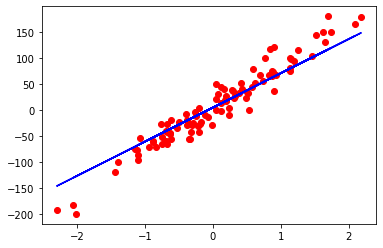

In [144]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 数据准备
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)
y = y.view(y.shape[0], 1)  # 二维扩展
n_samples, n_features = x.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
# 2) loss
lr = 0.01
criterion =  nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= lr)
# 3) training loop
epochs = 100
for epoch in range(epochs):
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 ==0:
        print(f'epoch：{epoch+1}, loss= {loss.item():.4f}')
# plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')

## 3  构建数据集

### DataLoader

In [146]:
import torch
import torch.utils.data as Data
batch_size = 3
x = torch.linspace(1,10,10)  # 1 -->10, 共产生 10 个数据
y = torch.linspace(10,1,10)
x,y, x.shape, y.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.]),
 torch.Size([10]),
 torch.Size([10]))

In [147]:
# 将 x,y 组成一个完整的数据集, 并转化为pytorch能识别的数据集类型：

torch_dataset = Data.TensorDataset(x,y)
type(torch_dataset)

torch.utils.data.dataset.TensorDataset

In [149]:
# 产生迭代器
"""
dataset：Dataset类型，从其中加载数据 
batch_size：int，可选。每个batch加载多少样本 
shuffle：bool，可选。为True时表示每个epoch都对数据进行洗牌 
sampler：Sampler，可选。从数据集中采样样本的方法。 
num_workers：int，可选。加载数据时使用多少子进程。默认值为0，表示在主进程中加载数据。 
collate_fn：callable，可选。 
pin_memory：bool，可选 
drop_last：bool，可选。True表示如果最后剩下不完全的batch,丢弃。False表示不丢弃。
"""
loader = Data.DataLoader(dataset = torch_dataset,
                        batch_size = batch_size,
                        shuffle = True,  # 每个epoch 打乱数据
                        num_workers =2)  # 多线程读取数据
for epoch in range(3):
    i =0
    for batch_x, batch_y in loader:
        i += 1
        print(f'Epoch: {epoch} | num:{i} | batch_x: {batch_x} | batch_y: {batch_y}')
    print(f'-'*20)

Epoch: 0 | num:1 | batch_x: tensor([3., 2., 8.]) | batch_y: tensor([8., 9., 3.])
Epoch: 0 | num:2 | batch_x: tensor([10.,  6.,  7.]) | batch_y: tensor([1., 5., 4.])
Epoch: 0 | num:3 | batch_x: tensor([5., 1., 9.]) | batch_y: tensor([ 6., 10.,  2.])
Epoch: 0 | num:4 | batch_x: tensor([4.]) | batch_y: tensor([7.])
--------------------
Epoch: 1 | num:1 | batch_x: tensor([10.,  8.,  7.]) | batch_y: tensor([1., 3., 4.])
Epoch: 1 | num:2 | batch_x: tensor([1., 5., 9.]) | batch_y: tensor([10.,  6.,  2.])
Epoch: 1 | num:3 | batch_x: tensor([3., 4., 6.]) | batch_y: tensor([8., 7., 5.])
Epoch: 1 | num:4 | batch_x: tensor([2.]) | batch_y: tensor([9.])
--------------------
Epoch: 2 | num:1 | batch_x: tensor([1., 9., 5.]) | batch_y: tensor([10.,  2.,  6.])
Epoch: 2 | num:2 | batch_x: tensor([8., 3., 6.]) | batch_y: tensor([3., 8., 5.])
Epoch: 2 | num:3 | batch_x: tensor([ 7., 10.,  4.]) | batch_y: tensor([4., 1., 7.])
Epoch: 2 | num:4 | batch_x: tensor([2.]) | batch_y: tensor([9.])
----------------

In [163]:
import torch, torchvision
from torch.utils.data import DataLoader, Dataset
import numpy as np 
import math

class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt('../data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])  # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples

dataset = WineDataset()
# first_data = dataset[0]
# features, labels = first_data
# print(features, labels)
dataloader = DataLoader(dataset=dataset, batch_size=4,
                       shuffle=True, num_workers=0)
# dataiter = iter(dataloader)
# data = dataiter.next()
# features, labels = data
# print(features, labels)

# training loop
num_epochs =2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward update
        if (i+1) % 5 ==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations},inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45,inputs torch.Size([4, 13])
epoch 1/2, step 10/45,inputs torch.Size([4, 13])
epoch 1/2, step 15/45,inputs torch.Size([4, 13])
epoch 1/2, step 20/45,inputs torch.Size([4, 13])
epoch 1/2, step 25/45,inputs torch.Size([4, 13])
epoch 1/2, step 30/45,inputs torch.Size([4, 13])
epoch 1/2, step 35/45,inputs torch.Size([4, 13])
epoch 1/2, step 40/45,inputs torch.Size([4, 13])
epoch 1/2, step 45/45,inputs torch.Size([2, 13])
epoch 2/2, step 5/45,inputs torch.Size([4, 13])
epoch 2/2, step 10/45,inputs torch.Size([4, 13])
epoch 2/2, step 15/45,inputs torch.Size([4, 13])
epoch 2/2, step 20/45,inputs torch.Size([4, 13])
epoch 2/2, step 25/45,inputs torch.Size([4, 13])
epoch 2/2, step 30/45,inputs torch.Size([4, 13])
epoch 2/2, step 35/45,inputs torch.Size([4, 13])
epoch 2/2, step 40/45,inputs torch.Size([4, 13])
epoch 2/2, step 45/45,inputs torch.Size([2, 13])


In [175]:
"""
数据的变形，
"""
import torch, torchvision
from torch.utils.data import DataLoader, Dataset
import numpy as np 
import math

class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt('../data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]  # n_samples, 1
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target

dataset = WineDataset(transform=None)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), labels)

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), labels)
        

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> [1.]
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> tensor([1.])


## 4  模型定义和操作

### 4.1自定义 loss

In [ ]:

class MyLoss(torch.nn.Moudle):
    def __init__(self):
        super(MyLoss, self).__init__()

    def forward(self, x, y):
        loss = torch.mean((x - y) ** 2)
        return loss

### 4.2 nn.Embedding
生成词向量的词表

padding_idx: 词向量永远为0的idx 


In [14]:
import torch
from torch import nn
embedding = nn.Embedding(10, 3)  # 10个词， 维度为3
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
for name, p in embedding.named_parameters():
    print(name)  # 属性名
    print(p)
    print(f'-'*50)

input.dtype,input.dim(), input.shape,  input, embedding(input)

weight
Parameter containing:
tensor([[ 1.0278, -1.3755,  0.2316],
        [ 0.9915,  0.3928,  1.3357],
        [ 0.2978, -0.2553, -0.2280],
        [-0.9130, -1.5362, -1.1074],
        [ 1.9163,  0.0219,  0.4835],
        [-1.7236, -1.3811, -0.0665],
        [ 1.5705,  0.7514, -1.4250],
        [-0.8454,  0.8156, -0.7461],
        [ 1.3230, -0.5123, -0.4535],
        [ 0.4754, -0.5178,  0.4085]], requires_grad=True)
--------------------------------------------------


(torch.int64,
 2,
 torch.Size([2, 4]),
 tensor([[1, 2, 4, 5],
         [4, 3, 2, 9]]),
 tensor([[[ 0.9915,  0.3928,  1.3357],
          [ 0.2978, -0.2553, -0.2280],
          [ 1.9163,  0.0219,  0.4835],
          [-1.7236, -1.3811, -0.0665]],
 
         [[ 1.9163,  0.0219,  0.4835],
          [-0.9130, -1.5362, -1.1074],
          [ 0.2978, -0.2553, -0.2280],
          [ 0.4754, -0.5178,  0.4085]]], grad_fn=<EmbeddingBackward0>))

In [6]:
embedding = nn.Embedding(10, 3, padding_idx=0)
>>> input = torch.LongTensor([[0,2,0,5]])
>>> embedding(input)

tensor([[[ 0.0000,  0.0000,  0.0000],
         [-0.8620,  0.7038, -0.5709],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.6577,  0.2938,  0.9861]]], grad_fn=<EmbeddingBackward0>)

### 4.3 nn.Linear
单层神经网络，线性变换层

[Applies a linear transformation to the incoming data: y = xA^T + by=xA ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)

In [11]:
>>> m = nn.Linear(20, 4)  # 输入维度 20，输出4
>>> input = torch.randn(2, 20)  # 2 为批次大小 
>>> output = m(input)
output


tensor([[ 0.3075, -0.1652, -0.5504,  1.4254],
        [ 0.6464,  0.6466, -0.1874, -0.0507]], grad_fn=<AddmmBackward0>)

In [14]:
# 添加激活函数
torch.sigmoid(output), torch.relu(output)

(tensor([[0.5763, 0.4588, 0.3658, 0.8062],
         [0.6562, 0.6562, 0.4533, 0.4873]], grad_fn=<SigmoidBackward0>),
 tensor([[0.3075, 0.0000, 0.0000, 1.4254],
         [0.6464, 0.6466, 0.0000, 0.0000]], grad_fn=<ReluBackward0>))

### 4.4 权重初始化
参考： [Pytorch初始化网络参数](https://www.pythonf.cn/read/92134)

In [26]:
from torch import nn
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(3, 3)
        self.linear2 = nn.Linear(3, 3)
        
        self._init_parameters()
        
    def forward(self, x):
        output = self.linear1(x)
        output = self.linear1(output)
        return output
        
    def _init_parameters(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight.data)
                nn.init.constant_(m.bias.data, 0)

net = MyModel()
for name, p in net.named_parameters():
    print(name)
    print(p)

linear1.weight
Parameter containing:
tensor([[ 0.2951,  0.3766, -0.9888],
        [-0.2123, -0.7743,  0.6933],
        [ 0.4799, -0.4210, -0.4167]], requires_grad=True)
linear1.bias
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
linear2.weight
Parameter containing:
tensor([[-0.9008, -0.1347, -0.8756],
        [-0.9189,  0.0655,  0.2971],
        [-0.4641, -0.5608, -0.0955]], requires_grad=True)
linear2.bias
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)


## 5 前向神经网络实现
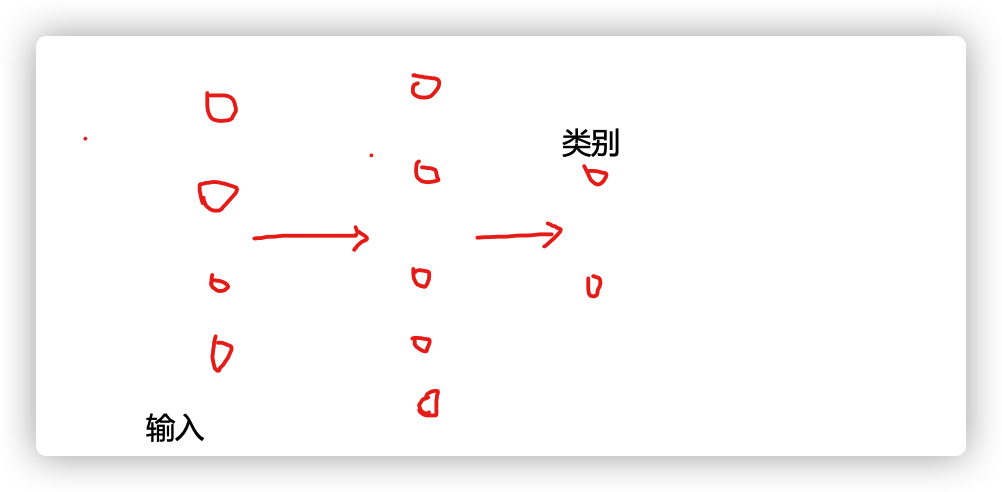

In [176]:
import torch
from torch import nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        # 线性变换：输入层->隐含层
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        # 使用ReLU激活函数
        self.activate = F.relu
        # 线性变换：隐含层->输出层
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        hidden = self.linear1(inputs)
        activation = self.activate(hidden)
        outputs = self.linear2(activation)
        probs = F.softmax(outputs, dim=1) # 获得每个输入属于某一类别的概率
        return probs

mlp = MLP(input_dim=4, hidden_dim=5, num_class=2)
inputs = torch.rand(3, 4) # 输入形状为(3, 4)的张量，其中3表示有3个输入，4表示每个输入的维度
probs = mlp(inputs) # 自动调用forward函数
print(probs) # 输出3个输入对应输出的概率

tensor([[0.4416, 0.5584],
        [0.4583, 0.5417],
        [0.4439, 0.5561]], grad_fn=<SoftmaxBackward>)


torch.Size([100, 1, 28, 28]) torch.Size([100])


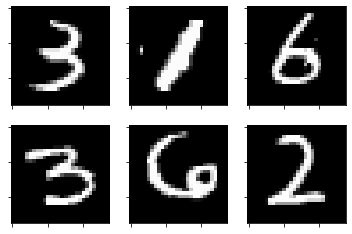

epoch 1 / 2, step 100/600, loss=0.4668
epoch 1 / 2, step 200/600, loss=0.3376
epoch 1 / 2, step 300/600, loss=0.2224
epoch 1 / 2, step 400/600, loss=0.2604
epoch 1 / 2, step 500/600, loss=0.1945
epoch 1 / 2, step 600/600, loss=0.2201
epoch 2 / 2, step 100/600, loss=0.3505
epoch 2 / 2, step 200/600, loss=0.2502
epoch 2 / 2, step 300/600, loss=0.1253
epoch 2 / 2, step 400/600, loss=0.1791
epoch 2 / 2, step 500/600, loss=0.1536
epoch 2 / 2, step 600/600, loss=0.1549
accuracy: 95.32


In [206]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

input_size = 784   # 28*28
hidden_size = 100
num_classes = 10
epoches =2
batch_size =100
lr = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='../../corpus', train=True,
                                          transform=transforms.ToTensor(), 
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='../../corpus', train=False,
                                          transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, shuffle=False)
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')  # 0 表示 channel
plt.show()

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_class):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activate = F.relu
        self.linear2 = nn.Linear(hidden_dim, num_class)

    def forward(self, inputs):
        hidden = self.linear1(inputs)
        activation = self.activate(hidden)
        outputs = self.linear2(activation)
#         probs = F.softmax(outputs, dim=1) # 获得每个输入属于某一类别的概率
        return outputs  # 后面使用交叉熵，可以不写 softmax 这里

model = MLP(input_size, hidden_size, num_classes)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_total_steps = len(train_loader)
for epoch in range(epoches):
    for i, (images, labels) in enumerate(train_loader):
        # 100， 1, 28,28  -->  100, 784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        # backwards
        optimizer.zero_grad()  # 放在最后？？？
        loss.backward()
        optimizer.step()
        
        if (i+1) %100==0:
            print(f'epoch {epoch+1} / {epoches}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}')
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # 返回 value，index
        _, pred = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (pred == labels).sum().item()
    acc = 100*n_correct/n_samples
    print(f'accuracy: {acc}')
  


## 6 CNN
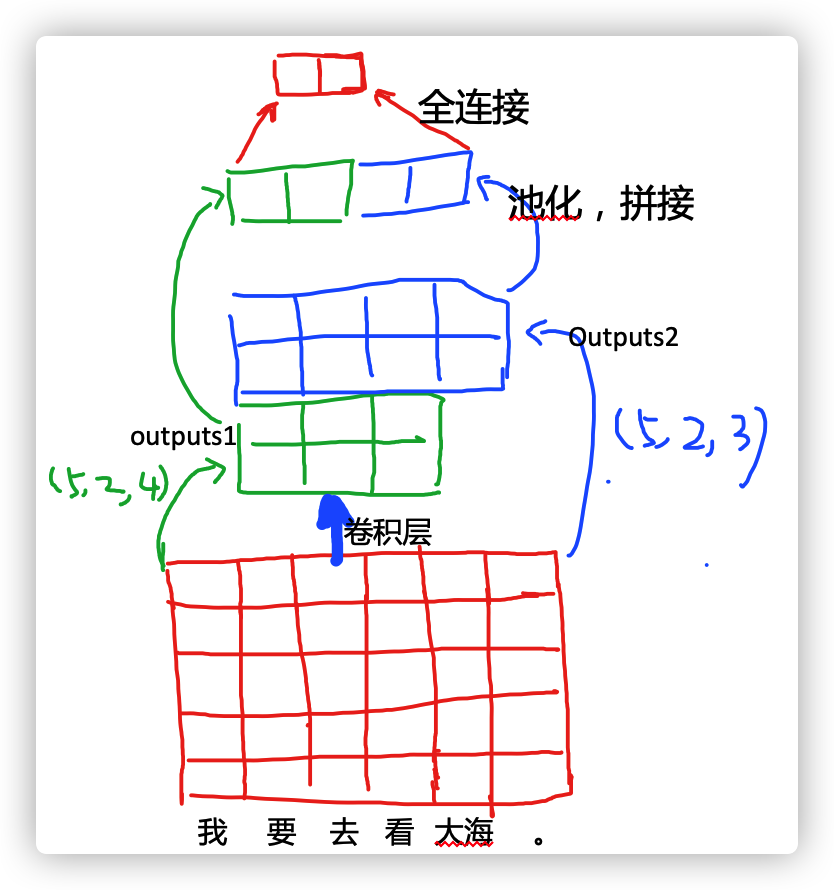

In [214]:
# 卷积实现

import torch
from torch.nn import Conv1d
conv1 = Conv1d(5,2,4)   # （输入词向量维度，卷积核个数， 每个核宽度 ）
conv2 = Conv1d(5,2,3)

inputs = torch.rand(2,5,6) #  2批次，向量维度 5， 每个序列长度为 6
outputs1 = conv1(inputs)
outputs2 = conv2(inputs)
print(outputs1,'\n',outputs1.shape, '------\n',outputs2, '\n', outputs2.shape)

tensor([[[ 0.2540, -0.3621, -0.0559],
         [-0.1453,  0.0531, -0.0199]],

        [[-0.2242, -0.2070, -0.2601],
         [-0.1254,  0.1582,  0.2042]]], grad_fn=<SqueezeBackward1>) 
 torch.Size([2, 2, 3]) ------
 tensor([[[0.6315, 0.6745, 0.4915, 0.4369],
         [0.0053, 0.1644, 0.1896, 0.2954]],

        [[0.5417, 0.8247, 0.7258, 0.7523],
         [0.4545, 0.2264, 0.5100, 0.3949]]], grad_fn=<SqueezeBackward1>) 
 torch.Size([2, 2, 4])


In [15]:
# 池化
from torch.nn import MaxPool1d
pool1 = MaxPool1d(3)
pool2 = MaxPool1d(4)
outputs_pool1 = pool1(outputs1)
outputs_pool2 = pool1(outputs2)
outputs_pool1, outputs_pool2,  outputs_pool1.dim()

(tensor([[[0.3225],
          [0.3083]],
 
         [[0.1983],
          [0.3762]]], grad_fn=<SqueezeBackward1>),
 tensor([[[ 0.1491],
          [-0.2222]],
 
         [[ 0.1644],
          [ 0.0795]]], grad_fn=<SqueezeBackward1>),
 3)

In [22]:
# 拼接
outputs_pool_squeeze1 = outputs_pool1.squeeze(dim=2)
print(outputs_pool_squeeze1)
outputs_pool_squeeze2 = outputs_pool2.squeeze(dim=2)
print(outputs_pool_squeeze2)
outputs_pool = torch.cat([outputs_pool_squeeze1, outputs_pool_squeeze2], dim=1)
outputs_pool

tensor([[0.3225, 0.3083],
        [0.1983, 0.3762]], grad_fn=<SqueezeBackward1>)
tensor([[ 0.1491, -0.2222],
        [ 0.1644,  0.0795]], grad_fn=<SqueezeBackward1>)


tensor([[ 0.3225,  0.3083,  0.1491, -0.2222],
        [ 0.1983,  0.3762,  0.1644,  0.0795]], grad_fn=<CatBackward0>)

In [23]:
## 全连接，实现分类
from torch.nn import Linear
linear = Linear(4,2)
linear(outputs_pool)

tensor([[ 0.7254, -0.1475],
        [ 0.6868, -0.0672]], grad_fn=<AddmmBackward0>)

### RNN
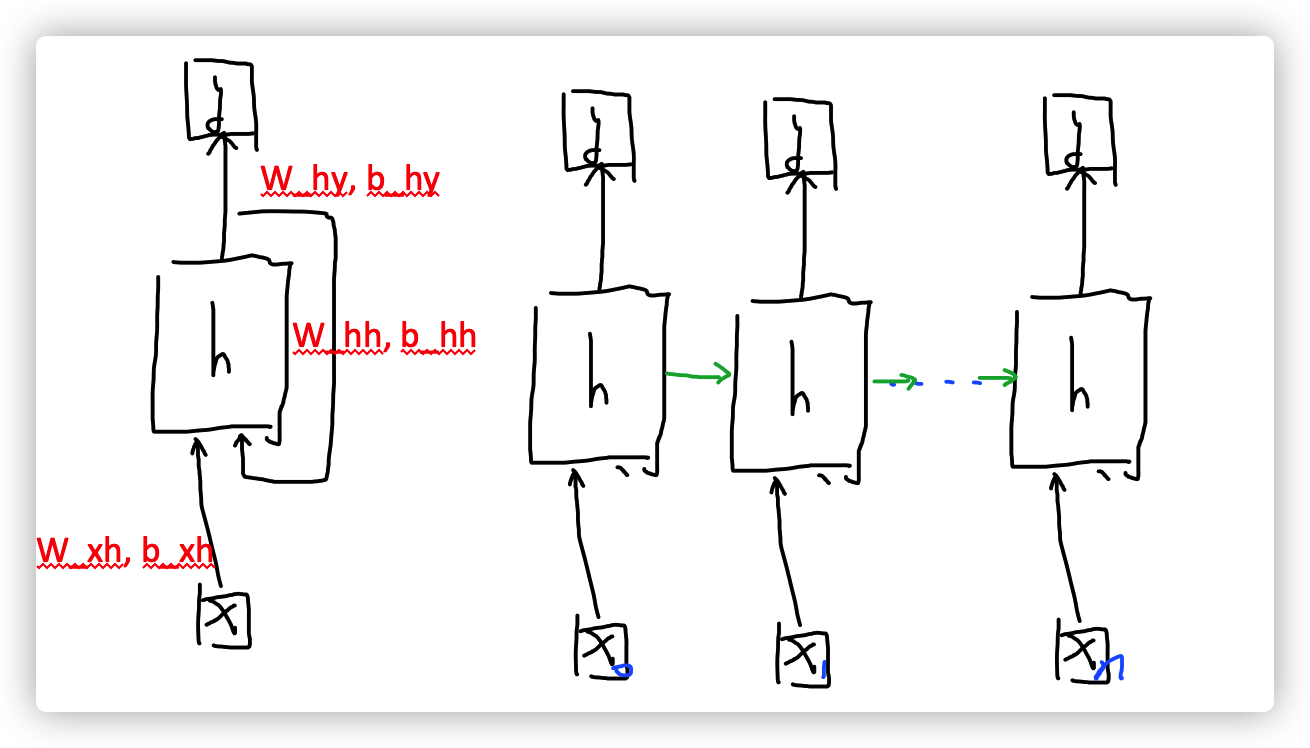

In [15]:
# 实现
"""
batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False
"""
from torch.nn import RNN
# 对于RNN 来说，需要知道输入维度，以及隐藏层输出维度
rnn = RNN(input_size=4, hidden_size=5, batch_first=True)
inputs = torch.rand(2,3,4)  #  (batch, seq, feature)
outputs, hn = rnn(inputs)  # outputs 为输出序列隐藏层，hn 为最后时刻的
outputs, hn

(tensor([[[ 0.5206,  0.2132,  0.0281,  0.1055,  0.1837],
          [ 0.3421,  0.3074, -0.0131,  0.0987, -0.1864],
          [ 0.3430,  0.1647, -0.2433,  0.0686, -0.0902]],
 
         [[ 0.4189,  0.2265, -0.2589,  0.2044,  0.1869],
          [ 0.1689,  0.1760, -0.1484,  0.0767, -0.2019],
          [ 0.3650, -0.0149, -0.1811,  0.0993, -0.0106]]],
        grad_fn=<TransposeBackward1>),
 tensor([[[ 0.3430,  0.1647, -0.2433,  0.0686, -0.0902],
          [ 0.3650, -0.0149, -0.1811,  0.0993, -0.0106]]],
        grad_fn=<StackBackward0>))

In [32]:
# lstm实现

from torch.nn import LSTM
lstm = LSTM(input_size=4, hidden_size=5, batch_first=True)
inputs = torch.rand(2,3,4)  #  (batch, seq, feature)
# outputs 为输出序列隐藏层，hn 为最后时刻的,cn 为最后时刻的记忆cell
outputs, (hn, cn) = lstm(inputs)  
outputs, hn, cn

(tensor([[[ 0.0736,  0.0465,  0.1377,  0.0791, -0.1235],
          [ 0.0768,  0.0338,  0.1956,  0.0293, -0.1300],
          [ 0.1188, -0.0071,  0.2372,  0.0066, -0.1484]],
 
         [[ 0.0856,  0.0006,  0.1674,  0.0893, -0.0964],
          [ 0.0974,  0.0628,  0.2043,  0.0876, -0.1396],
          [ 0.1209,  0.0532,  0.2544,  0.0964, -0.2009]]],
        grad_fn=<TransposeBackward0>),
 tensor([[[ 0.1188, -0.0071,  0.2372,  0.0066, -0.1484],
          [ 0.1209,  0.0532,  0.2544,  0.0964, -0.2009]]],
        grad_fn=<StackBackward0>),
 tensor([[[ 0.3276, -0.0139,  0.4877,  0.0092, -0.2837],
          [ 0.3989,  0.1134,  0.6412,  0.1216, -0.3780]]],
        grad_fn=<StackBackward0>))

### Transformer
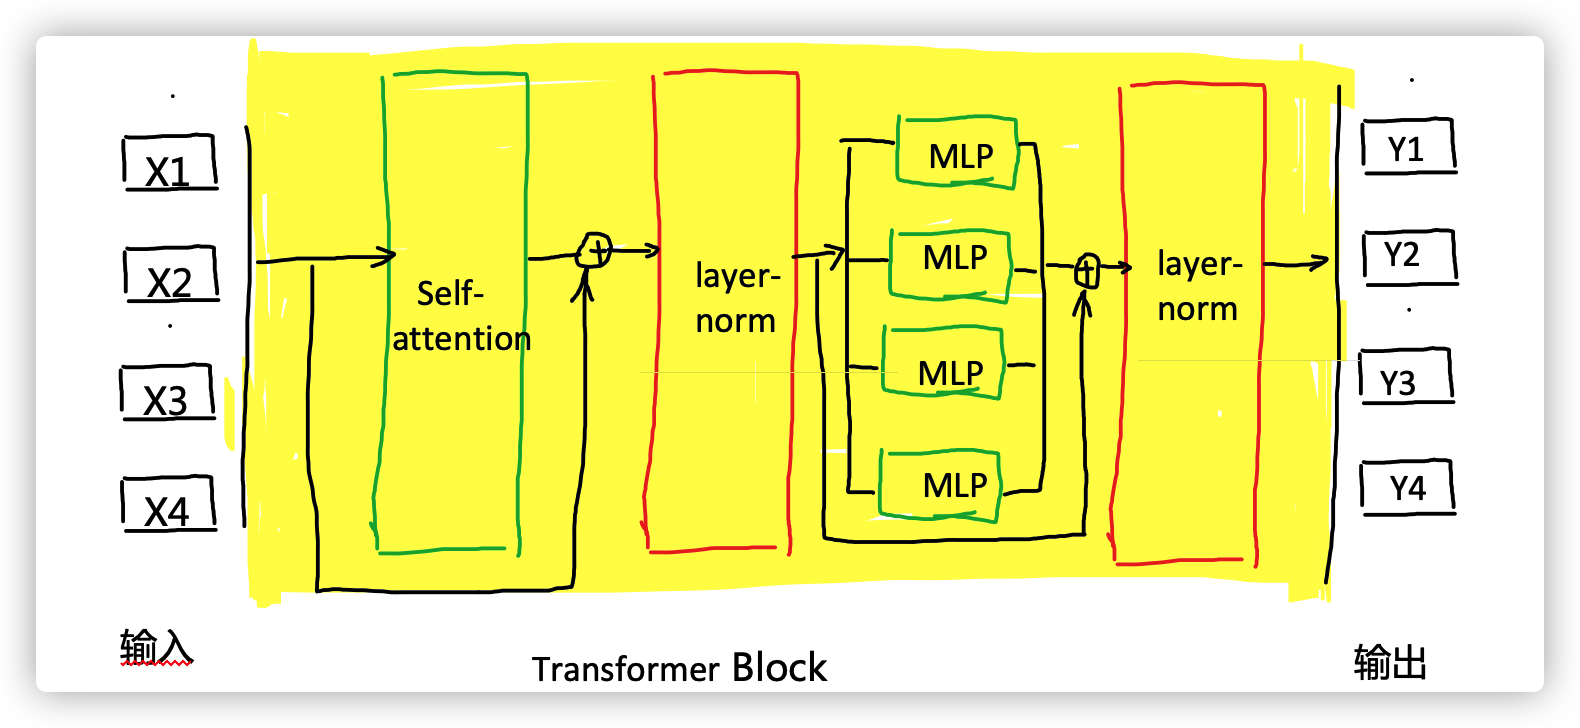

In [58]:
import torch
from torch import nn
# encoder 结构，输入、输出维度为4
encoder_layer = nn.TransformerEncoderLayer(d_model=4, nhead=2)  # 每个输入向量、输出向量维度为4， 头数为
src = torch.rand(2,3,4)  # 序列长度，批次，向量维度
out = encoder_layer(src)
out, out.shape

(tensor([[[ 0.7505,  1.2190, -1.0597, -0.9098],
          [ 1.0675, -1.6417,  0.3006,  0.2736],
          [-0.9064,  1.4749,  0.3644, -0.9329]],
 
         [[-0.5376, -0.5572,  1.7309, -0.6361],
          [ 0.9547, -0.1063,  0.7415, -1.5898],
          [ 1.0132, -0.5985,  0.9172, -1.3319]]],
        grad_fn=<NativeLayerNormBackward0>),
 torch.Size([2, 3, 4]))

- 将多个 Transformer块 堆叠
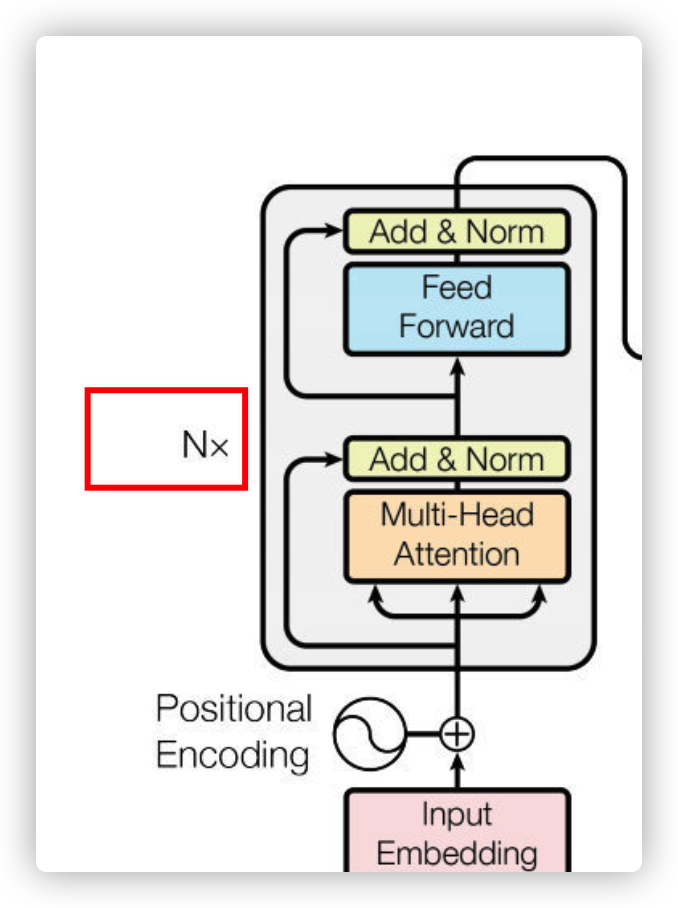



In [59]:

transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
transformer_encoder(src)

tensor([[[-7.1689e-04,  1.6127e+00, -5.8252e-01, -1.0295e+00],
         [ 1.7082e+00, -8.3320e-01, -3.8690e-01, -4.8806e-01],
         [ 6.2268e-02,  1.1571e+00,  3.6849e-01, -1.5879e+00]],

        [[ 6.3318e-01, -1.7903e-01,  1.0890e+00, -1.5431e+00],
         [ 1.3231e+00,  4.7394e-01, -4.4566e-01, -1.3514e+00],
         [ 9.1392e-01, -5.6437e-01,  1.0053e+00, -1.3548e+00]]],
       grad_fn=<NativeLayerNormBackward0>)

- 解码

In [7]:
memory = transformer_encoder(src)
decoder_layer = nn.TransformerDecoderLayer(d_model=4, nhead=2)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
out_part = torch.rand(2,3,4)
transformer_decoder(out_part, memory)

tensor([[[-1.2931, -0.5654,  1.3042,  0.5543],
         [-0.1598,  0.3754, -1.4881,  1.2724],
         [ 1.0663, -0.2951, -1.4988,  0.7276]],

        [[-1.1753, -0.7455,  1.2906,  0.6302],
         [ 0.0716,  0.0912, -1.4908,  1.3281],
         [ 0.6995,  0.1632, -1.6787,  0.8160]]],
       grad_fn=<NativeLayerNormBackward0>)